In [1]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import datetime

def d1(S, K, r, sigma, T):
    """Calculate d1 in the Black-Scholes model."""
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    return d1

def d2(S, K, r, sigma, T):
    """Calculate d2 in the Black-Scholes model."""
    d2 = d1(S, K, r, sigma, T) - sigma * np.sqrt(T)
    return d2

def call_price(S, K, r, sigma, T):
    """Calculate the price of a European call option using the Black-Scholes model."""
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    call_price = S * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)
    return call_price

# User input
ticker = input('Enter a ticker symbol: ')
expiration = datetime.date(2023, 4, 28) # yyyy, mm, dd
strike_price = float(input('Enter a strike price: '))

# Stock data
stock = yf.Ticker(ticker)
S = stock.history(period='1d')['Close'][0] # current stock price
market_returns = yf.Ticker('^GSPC').history(period='max', interval='1mo').Close.pct_change().dropna() # historical market returns
r = np.mean(market_returns) # expected return (annualized)
sigma = stock.history(period='1y').Close.pct_change().std() * np.sqrt(252) # annualized volatility

# Calculate time to expiration in years
today = datetime.date.today()
T = (expiration - today).days / 365

# Calculate the call price using the Black-Scholes model
call_price = call_price(S, strike_price, r, sigma, T)

print(f'Call price for {ticker} with a strike price of {strike_price} and expiration date of {expiration} is: {call_price:.2f}')

Enter a ticker symbol: F
Enter a strike price: 12.5
Call price for F with a strike price of 12.5 and expiration date of 2023-04-28 is: 0.43


Enter a ticker symbol: F
Enter a strike price: 12


<IPython.core.display.Javascript object>


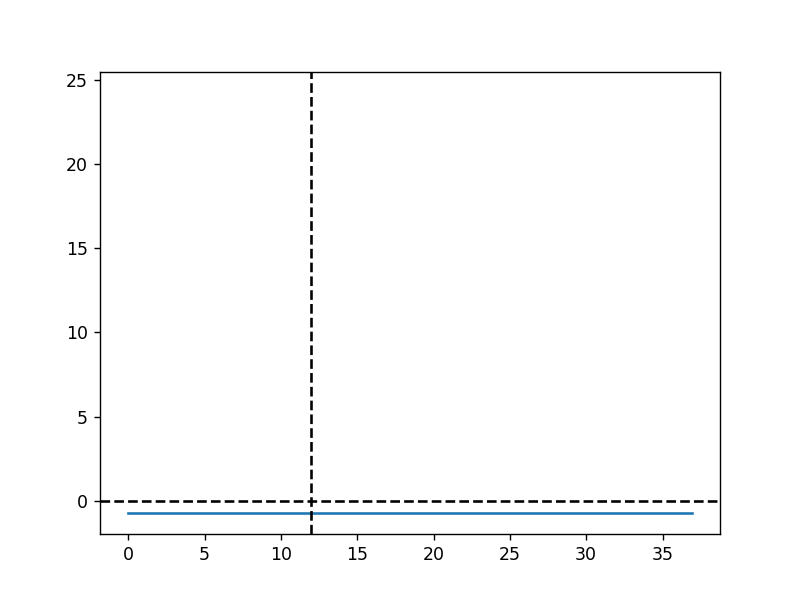

In [4]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

def d1(S, K, r, sigma, T):
    """Calculate d1 in the Black-Scholes model."""
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    return d1

def d2(S, K, r, sigma, T):
    """Calculate d2 in the Black-Scholes model."""
    d2 = d1(S, K, r, sigma, T) - sigma * np.sqrt(T)
    return d2

def call_price(S, K, r, sigma, T):
    """Calculate the price of a European call option using the Black-Scholes model."""
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    call_price = S * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)
    return call_price

# User input
ticker = input('Enter a ticker symbol: ')
expiration = datetime.date(2023, 4, 28) # yyyy, mm, dd
strike_price = float(input('Enter a strike price: '))

# Stock data
stock = yf.Ticker(ticker)
S = stock.history(period='1d')['Close'][0] # current stock price
market_returns = yf.Ticker('^GSPC').history(period='max', interval='1mo').Close.pct_change().dropna() # historical market returns
r = np.mean(market_returns) # expected return (annualized)
sigma = stock.history(period='1y').Close.pct_change().std() * np.sqrt(252) # annualized volatility

# Calculate time to expiration in years
today = datetime.date.today()
T = (expiration - today).days / 365

# Calculate the call price using the Black-Scholes model
call_price = call_price(S, strike_price, r, sigma, T)

# Set up payoff function
lower_bound = max(0, strike_price - 2 * S) # lower bound for stock price range
upper_bound = strike_price + 2 * S # upper bound for stock price range
n_steps = 100 # number of steps in stock price range
stock_prices = np.linspace(lower_bound, upper_bound, n_steps) # array of possible stock prices
payoff = np.maximum(stock_prices - strike_price, 0) - call_price # payoff at each stock price
fig, ax = plt.subplots()
line, = ax.plot(stock_prices, payoff)
ax.axhline(y=0, linestyle='--', color='black')
ax.axvline(x=strike_price, linestyle='--', color='black')

# Function to update the line in the animation
def update(i):
    S = stock_prices[i]
    new_payoff = np.maximum(S - strike_price, 0) - call_price
    line.set_ydata(new_payoff)
    return line,

# Create and run animation
anim = FuncAnimation(fig, update, frames=n_steps, interval=50, blit=True)

plt.show()

Enter a ticker symbol: F
Enter a strike price: 12


<IPython.core.display.Javascript object>


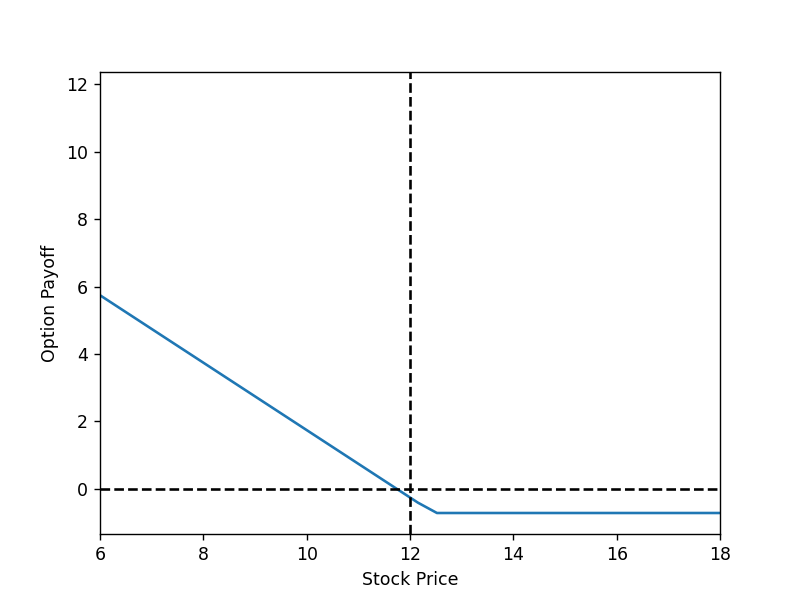

In [11]:
import numpy as np
from scipy.stats import norm
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

def d1(S, K, r, sigma, T):
    """Calculate d1 in the Black-Scholes model."""
    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    return d1

def d2(S, K, r, sigma, T):
    """Calculate d2 in the Black-Scholes model."""
    d2 = d1(S, K, r, sigma, T) - sigma * np.sqrt(T)
    return d2

def call_price(S, K, r, sigma, T):
    """Calculate the price of a European call option using the Black-Scholes model."""
    d1_val = d1(S, K, r, sigma, T)
    d2_val = d2(S, K, r, sigma, T)
    call_price = S * norm.cdf(d1_val) - K * np.exp(-r * T) * norm.cdf(d2_val)
    return call_price


# Create a range of stock prices
stock_prices = pd.Series(range(int(S*0.5), int(S*1.5)))


def option_payoff(S, K, call_price):
    """Calculate the payoff for a call option at a given stock price."""
    return np.where(S < K, -call_price, S - K - call_price)

# User input
ticker = input('Enter a ticker symbol: ')
expiration = datetime.date(2023, 4, 28) # yyyy, mm, dd
strike_price = float(input('Enter a strike price: '))

# Stock data
stock = yf.Ticker(ticker)
S = stock.history(period='1d')['Close'][0] # current stock price
market_returns = yf.Ticker(ticker).history(period='max', interval='1mo').Close.pct_change().dropna() # historical market returns
r = np.mean(market_returns) # expected return (annualized)
sigma = stock.history(period='1y').Close.pct_change().std() * np.sqrt(252) # annualized volatility

# Calculate time to expiration in years
today = datetime.date.today()
T = (expiration - today).days / 365

# Calculate the call price using the Black-Scholes model
call_price = call_price(S, strike_price, r, sigma, T)
option_premium = call_price

# Set up payoff function
lower_bound = max(0, S - 2*strike_price) # lower bound for stock price range
upper_bound = S + 2*strike_price # upper bound for stock price range
n_steps = 100 # number of steps in stock price range
strike_prices = np.linspace(lower_bound, upper_bound, n_steps) # array of possible strike prices
payoff = option_payoff(S, strike_prices, call_price) # payoff at each strike price
fig, ax = plt.subplots()
line, = ax.plot(strike_prices, payoff)
ax.axhline(y=0, linestyle='--', color='black')
ax.axvline(x=strike_price, linestyle='--', color='black')
# Set the axis limits
ax.set_xlim([int(S*0.5), int(S*1.5)])


# Apply the option payoff function to the stock price range
option_payoffs = stock_prices.apply(option_payoff, args=(strike_price, option_premium))

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create and run animation
anim = FuncAnimation(fig, update, frames=n_steps, interval=50, blit=True)

plt.show()